In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, layers
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import layers

import os
import numpy as np
import pandas as np

from random import randint
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
main_dir = r"C:\Users\Admin\Desktop\chest_xray"
train_data_dir = main_dir + r"\train"
validation_data_dir = main_dir + r"\val"
test_data_dir = main_dir + r"\test"

nb_train_samples = 5216
nb_validation_samples = 16
epochs = 20
batch_size = 16

print("Working Directory Contents:", os.listdir(r"C:\Users\Admin\Desktop\chest_xray"))

Working Directory Contents: ['.ipynb_checkpoints', 'chestxray_cnn_model_3.h5', 'chest_xray', 'main.ipynb', 'test', 'tp.ipynb', 'train', 'val', '__MACOSX']


In [4]:
train_n = train_data_dir+'NORMAL/'
train_p = train_data_dir+'PNEUMONIA/'

print("length of cases in training set:",len(os.listdir(r"C:\Users\Admin\Desktop\chest_xray\train\PNEUMONIA")) + len(os.listdir(r"C:\Users\Admin\Desktop\chest_xray\train\NORMAL")))
print("length of pneumonia cases in training set:",len(os.listdir(r"C:\Users\Admin\Desktop\chest_xray\train\PNEUMONIA")))
print("length of normal cases in training set:",len(os.listdir(r"C:\Users\Admin\Desktop\chest_xray\train\NORMAL")))

length of cases in training set: 5216
length of pneumonia cases in training set: 3875
length of normal cases in training set: 1341


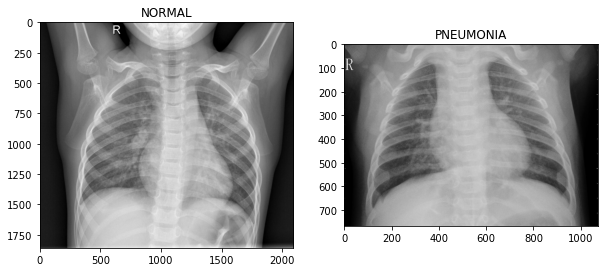

In [5]:
# Quick look to the images 

img_name = 'IM-0115-0001.jpeg'
img_normal = load_img(r'C:\Users\Admin\Desktop\chest_xray\train\NORMAL\IM-0115-0001.jpeg')

img_name_1 = 'person1000_virus_1681.jpeg'
img_pneumonia = load_img(r'C:\Users\Admin\Desktop\chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg')

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")
axs[1].imshow(img_pneumonia)
axs[1].set_title("PNEUMONIA");

In [6]:
img_height, img_width  = 180, 180


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
# Performing Image Augmentation to have more data samples

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


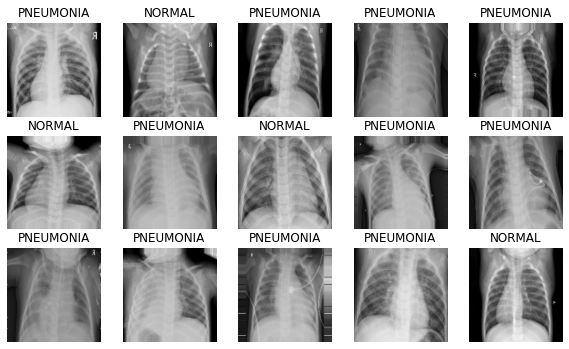

In [8]:
# Show some images after data augmentation

image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(15):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch(image_batch, label_batch)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
# Define the callbacks

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [12]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stopping_cb])

C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
326/326 [==============================] - 604s 2s/step - loss: 0.4824 - accuracy: 0.7841 - val_loss: 0.5551 - val_accuracy: 0.8125
Epoch 2/20
326/326 [==============================] - 394s 1s/step - loss: 0.2823 - accuracy: 0.8882 - val_loss: 0.3606 - val_accuracy: 0.8750
Epoch 3/20
326/326 [==============================] - 379s 1s/step - loss: 0.2487 - accuracy: 0.9038 - val_loss: 1.0824 - val_accuracy: 0.6250
Epoch 4/20
326/326 [==============================] - 414s 1s/step - loss: 0.2034 - accuracy: 0.9222 - val_loss: 0.4435 - val_accuracy: 0.7500
Epoch 5/20
326/326 [==============================] - 398s 1s/step - loss: 0.2148 - accuracy: 0.9305 - val_loss: 0.2666 - val_accuracy: 0.9375
Epoch 6/20
326/326 [==============================] - 430s 1s/step - loss: 0.1927 - accuracy: 0.9350 - val_loss: 0.7498 - val_accuracy: 0.6875
Epoch 7/20
326/326 [==============================] - 440s 1s/step - loss: 0.1857 - accuracy: 0.9374 - val_loss: 0.2249 - val_accuracy: 0.9375

In [13]:
# Evaluate the model
scores = model.evaluate_generator(test_generator)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))



C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss of the model: 0.40
Test Accuracy: 86.86%


In [14]:
# Saving the model for future use

from keras.models import load_model

model.save('chestxray_cnn_model_3.h5') 

predicted: NORMAL


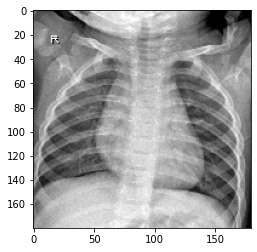

In [17]:
def predict_image(filename):
    img = load_img(filename, target_size=(img_height, img_width))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,180,180,3)
    model = load_model('chestxray_cnn_model_3.h5')
    prediction = model.predict(image)
    plt.imshow(img)
    if(prediction[0] > 0.5):
        print("predicted: PNEUMONIA")
    else:
        print("predicted: NORMAL")
   
predict_image(r"C:\Users\Admin\Desktop\chest_xray\train\NORMAL\IM-0140-0001.jpeg")